In [1]:
##
##
##
## PowerSystem_Dataset
##
##o

In [2]:
##
##
##
## preprocessing du dataset
##
##
## 

In [3]:

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from scipy.stats import entropy
from statsmodels.tsa import stattools
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import *

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [4]:
data_1 = pd.read_csv("data1.csv")

In [5]:
##
##
##
## description du dataset 
##
##
## 

In [6]:
data_1.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
count,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,...,4966.0,4966.0,4966.000000,4966.000000,4966.000000,4966.000000,4966.0,4966.0,4966.0,4966.0
mean,-17.925492,130994.354960,8.610555,131258.159486,1.681621,131575.619600,-17.467920,397.526132,10.507730,390.915035,...,0.0,0.0,0.037857,0.022755,0.018526,0.029803,0.0,0.0,0.0,0.0
std,98.099812,6545.849798,115.044643,2692.553537,96.408966,2772.274253,97.437891,181.156073,111.699778,143.141274,...,0.0,0.0,0.190871,0.149136,0.134857,0.170060,0.0,0.0,0.0,0.0
min,-179.988962,24998.050190,-179.994691,102449.381200,-179.960314,98161.852050,-179.988962,0.000000,-179.736860,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,-97.404258,131007.835800,-99.085889,130706.956500,-77.405166,131064.250625,-97.626279,317.146520,-90.269501,325.844245,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,-35.864293,131634.667500,17.077007,131333.788300,14.080438,131684.814000,-33.369062,389.658080,6.720795,391.855400,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,71.277382,132136.132900,116.783123,131835.253700,77.995312,132211.352700,67.545994,464.321182,115.522615,469.127820,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,179.994691,146302.530500,179.971773,146327.603700,179.966044,146452.970100,179.925936,1771.039920,179.988962,1263.642110,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0


In [7]:
data_1.columns.values

array(['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH',
       'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I',
       'R1-PA6:IH', 'R1-PM6:I', 'R1-PA7:VH', 'R1-PM7:V', 'R1-PA8:VH',
       'R1-PM8:V', 'R1-PA9:VH', 'R1-PM9:V', 'R1-PA10:IH', 'R1-PM10:I',
       'R1-PA11:IH', 'R1-PM11:I', 'R1-PA12:IH', 'R1-PM12:I', 'R1:F',
       'R1:DF', 'R1-PA:Z', 'R1-PA:ZH', 'R1:S', 'R2-PA1:VH', 'R2-PM1:V',
       'R2-PA2:VH', 'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA4:IH',
       'R2-PM4:I', 'R2-PA5:IH', 'R2-PM5:I', 'R2-PA6:IH', 'R2-PM6:I',
       'R2-PA7:VH', 'R2-PM7:V', 'R2-PA8:VH', 'R2-PM8:V', 'R2-PA9:VH',
       'R2-PM9:V', 'R2-PA10:IH', 'R2-PM10:I', 'R2-PA11:IH', 'R2-PM11:I',
       'R2-PA12:IH', 'R2-PM12:I', 'R2:F', 'R2:DF', 'R2-PA:Z', 'R2-PA:ZH',
       'R2:S', 'R3-PA1:VH', 'R3-PM1:V', 'R3-PA2:VH', 'R3-PM2:V',
       'R3-PA3:VH', 'R3-PM3:V', 'R3-PA4:IH', 'R3-PM4:I', 'R3-PA5:IH',
       'R3-PM5:I', 'R3-PA6:IH', 'R3-PM6:I', 'R3-PA7:VH', 'R3-PM7:V',
       'R3-PA8:VH',

In [8]:
print(pd.Series(data_1['marker']).value_counts())

Attack      3866
Natural      927
NoEvents     173
Name: marker, dtype: int64


In [9]:
data_1 = data_1.replace({'Attack': 2, 'Natural': 0,'NoEvents':1})

In [10]:
data_1.isnull().values.any()#nan values ?

False

In [11]:
data_1.isnull().any().any()

False

In [12]:
is_infini = np.isinf(data_1)

row_has_infini = is_infini.any(axis=1)

rows_with_infini = data_1[row_has_infini]

In [13]:
rows_with_infini.iloc[150].values
#il y a des valeurs infinies

array([-1.24091199e+02,  5.85711587e+04,  1.31390682e+02,  1.22608290e+05,
       -6.80100903e+00,  1.26469574e+05,  1.78092472e+02,  1.68149913e+03,
       -1.43972835e+02,  5.34681200e+01,  8.35028691e+01,  5.82289800e+01,
       -1.19043441e+02,  1.01396304e+05,  6.77866367e+01,  3.30967164e+04,
        6.77178818e+01,  1.02549674e+04, -1.79994691e+02,  5.28272350e+02,
        1.77175739e+02,  5.80458700e+02,  1.77250224e+02,  5.72951190e+02,
        6.00560000e+01, -2.00000000e-01,  5.15957647e-01,  1.17204394e+00,
        2.05800000e+03, -1.49735423e+02,  1.26584250e+05,  9.03213492e+01,
        1.26429305e+05, -2.97207656e+01,  1.26661039e+05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.49713444e+02,  1.26556773e+05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [14]:
rows_with_infini[rows_with_infini['marker']==1].count()

R1-PA1:VH     0
R1-PM1:V      0
R1-PA2:VH     0
R1-PM2:V      0
R1-PA3:VH     0
             ..
snort_log1    0
snort_log2    0
snort_log3    0
snort_log4    0
marker        0
Length: 129, dtype: int64

In [15]:
#on remplace les valeurs infinies par 2 fois la valeur max du dataset
for column in data_1:
    is_infini = np.isinf(data_1[column]).any()
    if is_infini == True:
        data_1[column] = data_1[column].replace({np.inf: data_1[column][data_1[column]!=np.inf].max() *2, -np.inf: data_1[column][data_1[column]!= -np.inf].max() *2})
        

In [16]:
is_infini = np.isinf(data_1)

row_has_infini = is_infini.any(axis=1)

rows_with_infini = data_1[row_has_infini]
rows_with_infini.count()

R1-PA1:VH     0
R1-PM1:V      0
R1-PA2:VH     0
R1-PM2:V      0
R1-PA3:VH     0
             ..
snort_log1    0
snort_log2    0
snort_log3    0
snort_log4    0
marker        0
Length: 129, dtype: int64

In [17]:
list_ndiscrt = list(data_1.columns.values)
list_ndiscrt.remove('marker')



In [18]:
############### preprocessing from sklearn.preprocessing import MinMaxScaler

In [19]:
from sklearn.preprocessing import RobustScaler

In [20]:
scaler = RobustScaler()
data_1_x = data_1.drop(['marker'],axis=1)

In [21]:
data_1[list_ndiscrt] = scaler.fit_transform(data_1_x)

In [22]:
data_1

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,0.629966,-3.511111,-0.308749,-3.266667,-1.181842,-3.453552,0.599729,1.469362,-0.309654,1.639617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.649462,-1.200000,-0.293593,-0.955556,-1.160605,-1.158470,0.636915,0.638258,-0.280226,0.761661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.649734,-1.177778,-0.293381,-0.933333,-1.160310,-1.136612,0.636777,0.638258,-0.280058,0.761661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.651806,-0.933333,-0.291736,-0.688889,-1.158061,-0.896175,0.638858,0.633281,-0.277748,0.748882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.654591,-0.488889,-0.289533,-0.244444,-1.155111,-0.459016,0.638650,0.644479,-0.275687,0.738658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,0.379970,-0.666667,-0.504044,-0.400000,0.863471,-0.633880,0.356737,0.474028,-0.497613,0.523962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4962,0.379766,-0.600000,-0.504230,-0.355556,0.863213,-0.568306,0.355002,0.482737,-0.497947,0.529073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4963,0.378611,-0.511111,-0.505159,-0.244444,0.861996,-0.480874,0.349244,0.507621,-0.500369,0.538019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4964,0.378441,-0.488889,-0.505265,-0.244444,0.861812,-0.480874,0.348897,0.506376,-0.500675,0.539297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
#on prépare un dataset PCA

In [25]:
######################### pca

In [77]:
from sklearn.decomposition import KernelPCA

In [78]:
pca = KernelPCA(n_components = 70)

In [79]:
Y = data_1.drop(list_ndiscrt,axis=1)

In [80]:
principalComponents = pca.fit_transform(data_1.drop(['marker'],axis=1))

/usr/local/lib64/python3.6/site-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


In [81]:
data_1_pca = pd.DataFrame(data = principalComponents)

In [82]:
data_1_pca = pd.concat([data_1_pca,Y],axis=1)
data_1_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,marker
0,-1559.249546,-646.499921,-87.109944,-2.174489,110.599768,-42.242369,-7.566613,9.219708,-1.117600,215.082241,...,0.007870,0.048069,0.083574,-0.007633,-0.047367,0.091795,0.027692,0.069156,-0.048424,1
1,-1558.825151,-646.627794,-87.097029,-2.176244,110.044760,-44.081106,-15.970861,7.581982,-1.302365,205.144135,...,-0.018883,-0.017666,0.108981,-0.017264,-0.019658,0.061180,0.028294,-0.082540,-0.032603,1
2,-1558.820236,-646.629039,-87.100523,-2.176874,109.986579,-44.370164,-17.344551,7.297708,-1.366874,202.905358,...,-0.014094,-0.018334,0.104522,-0.011609,-0.014086,0.077070,0.036717,-0.074249,-0.027496,1
3,-1558.830370,-646.629644,-87.105825,-2.160253,110.119898,-43.802965,-14.583629,7.874427,-1.124163,211.373700,...,-0.033363,-0.019699,0.112394,-0.036822,-0.035072,0.063382,0.021159,-0.068213,-0.048816,1
4,-1558.859805,-646.630958,-87.105634,-2.185533,110.420552,-42.820239,-9.850649,8.855629,-1.144235,208.524546,...,-0.023175,-0.011333,0.081187,-0.037758,-0.040910,0.068926,0.024620,-0.046941,-0.040166,1


In [83]:
########################## test classifiers sur données brutes

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn import ensemble

In [85]:
data_1_train = data_1.sample(frac=0.7)
data_1_test = data_1.drop(data_1_train.index)

data_1_train_x = data_1_train.drop(['marker'],axis=1)
data_1_train_y = data_1_train['marker']

data_1_test_x = data_1_test.drop(['marker'],axis=1)
data_1_test_y = data_1_test['marker']

In [86]:
## decision tree

In [87]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [88]:
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9194630872483222

In [89]:
confusion_matrix(data_1_test_y, y_dct)

array([[ 214,    1,   46],
       [   2,   45,    4],
       [  58,    9, 1111]])

In [90]:
## random forest

In [91]:
model = ensemble.RandomForestClassifier()

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9550335570469799

In [92]:
confusion_matrix(data_1_test_y, y_dct)

array([[ 221,    0,   40],
       [   0,   47,    4],
       [  22,    1, 1155]])

Text(0.5, 1.0, 'importance de la feature')

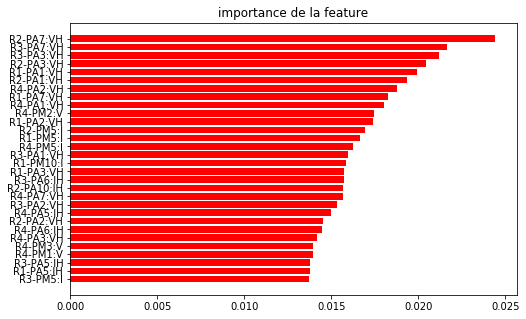

In [93]:
importances = model.feature_importances_
indices = np.argsort(importances)[-30:]

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)),importances[indices],color='r',align='center')
plt.yticks(range(len(indices)),data_1.columns[indices])
plt.title("importance de la feature")

In [94]:
########## autres

In [95]:
model = KNeighborsClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8342281879194631

In [96]:
model = GradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8993288590604027

In [97]:
model = GaussianNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.13087248322147652

In [98]:
model = SVC()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7899328859060403

In [99]:


from sklearn import tree

model = tree.ExtraTreeClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9194630872483222

In [100]:


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9691275167785235

In [120]:


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators = 55)
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9610738255033557

In [51]:


from sklearn.neighbors import NearestCentroid

model = NearestCentroid()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.05503355704697987

In [52]:


from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.5906040268456376

In [53]:

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,100,30), max_iter=1000,
                     solver='sgd')

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,   y_dct)

0.774496644295302

In [54]:
from sklearn.ensemble import AdaBoostClassifier


model = AdaBoostClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.6342281879194631

In [55]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9570469798657718

In [56]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
model = BaggingClassifier(base_estimator=tree.ExtraTreeClassifier(), n_estimators=10, random_state=0)
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)


0.963758389261745

In [57]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
model = BaggingClassifier(base_estimator=HistGradientBoostingClassifier(), n_estimators=10, random_state=0)
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)


0.963758389261745

In [58]:
from sklearn.ensemble import VotingClassifier

classifiers = [
    ('etc', tree.ExtraTreeClassifier()),
    ('hgbc', HistGradientBoostingClassifier())
    
]
model = VotingClassifier(classifiers)

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9355704697986578

In [59]:
#######  classifiers with Kpca

In [60]:
data_1_train = data_1_pca.sample(frac=0.7)
data_1_test = data_1_pca.drop(data_1_train.index)

data_1_train_x = data_1_train.drop(['marker'],axis=1)
data_1_train_y = data_1_train['marker']

data_1_test_x = data_1_test.drop(['marker'],axis=1)
data_1_test_y = data_1_test['marker']

In [61]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [62]:
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8060402684563759

In [63]:
confusion_matrix(data_1_test_y, y_dct)

array([[ 158,    3,  119],
       [  10,   25,   10],
       [ 139,    8, 1018]])

In [64]:
model = ensemble.RandomForestClassifier()

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
print(accuracy_score(data_1_test_y,y_dct))

print(confusion_matrix(data_1_test_y, y_dct))

0.8684563758389262
[[ 136    0  144]
 [   4   31   10]
 [  37    1 1127]]


In [65]:
model = KNeighborsClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7791946308724832

In [66]:
model = GradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8060402684563759

In [67]:
model = SVC()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7818791946308725

In [68]:


from sklearn import tree

model = tree.ExtraTreeClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8080536912751678

In [69]:


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8939597315436242

In [70]:
model = GaussianNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.20604026845637585

In [71]:


from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.6530201342281879

In [72]:


from sklearn.neighbors import NearestCentroid

model = NearestCentroid()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.05570469798657718

In [73]:

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(30,30,10), max_iter=1000,
                     solver='sgd')

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,   y_dct)

0.7818791946308725

In [74]:
from sklearn.ensemble import AdaBoostClassifier


model = AdaBoostClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7476510067114094

In [75]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8697986577181208

In [76]:
from sklearn.ensemble import VotingClassifier

classifiers = [
    ('etc', tree.ExtraTreeClassifier()),
    ('hgbc', HistGradientBoostingClassifier()),
    ('knc', KNeighborsClassifier()),
]
model = VotingClassifier(classifiers)

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8543624161073825

In [ ]:
#les scores avec KernelPCA sont pas mieux